In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Titanic-Dataset.csv')

In [6]:
summary_stats = df.describe(include='all')
summary_stats.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.0,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN


In [8]:
sns.set(style="whitegrid")


In [9]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns


## Histrograns

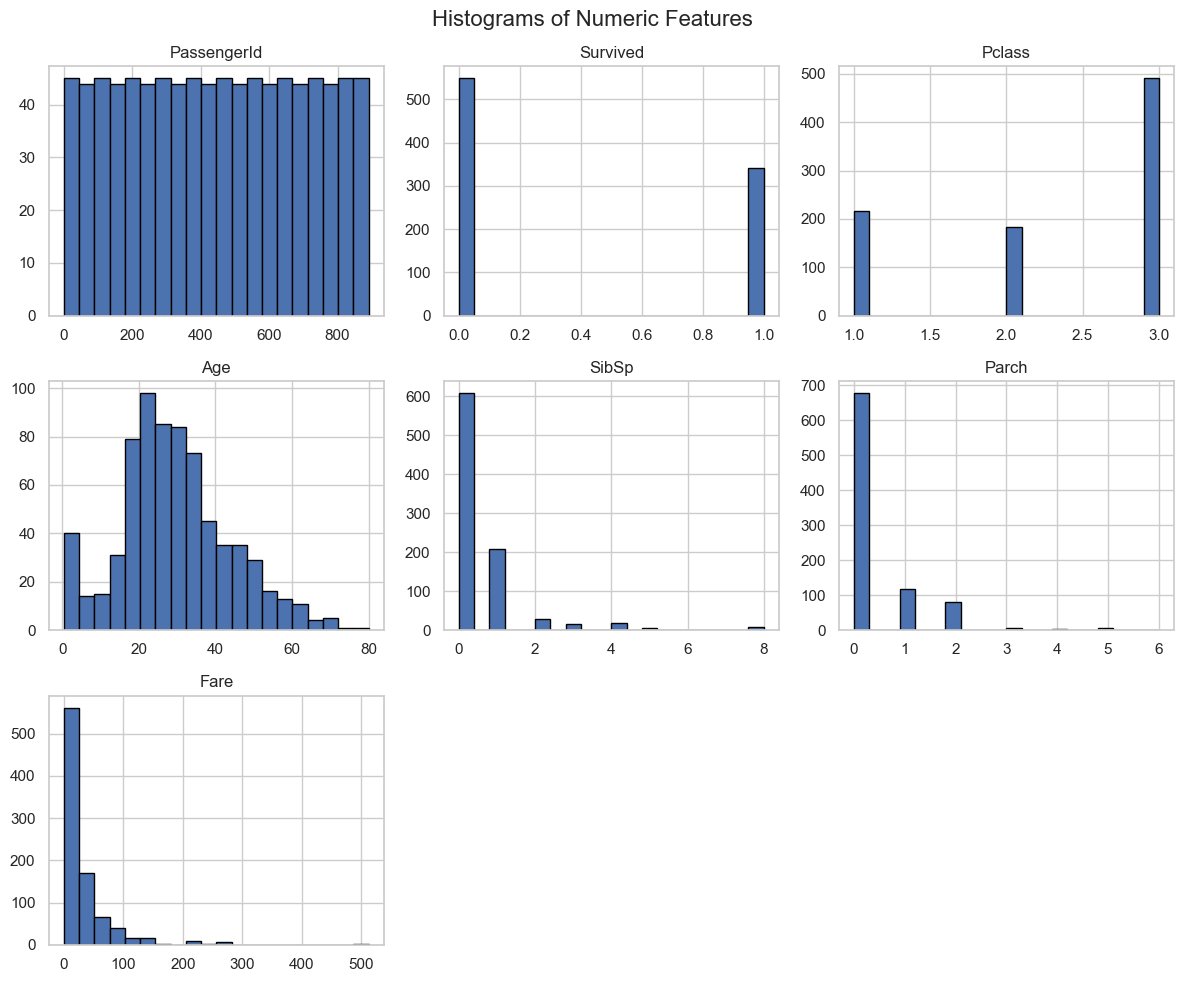

In [10]:
df[numeric_features].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

## BoxPlots

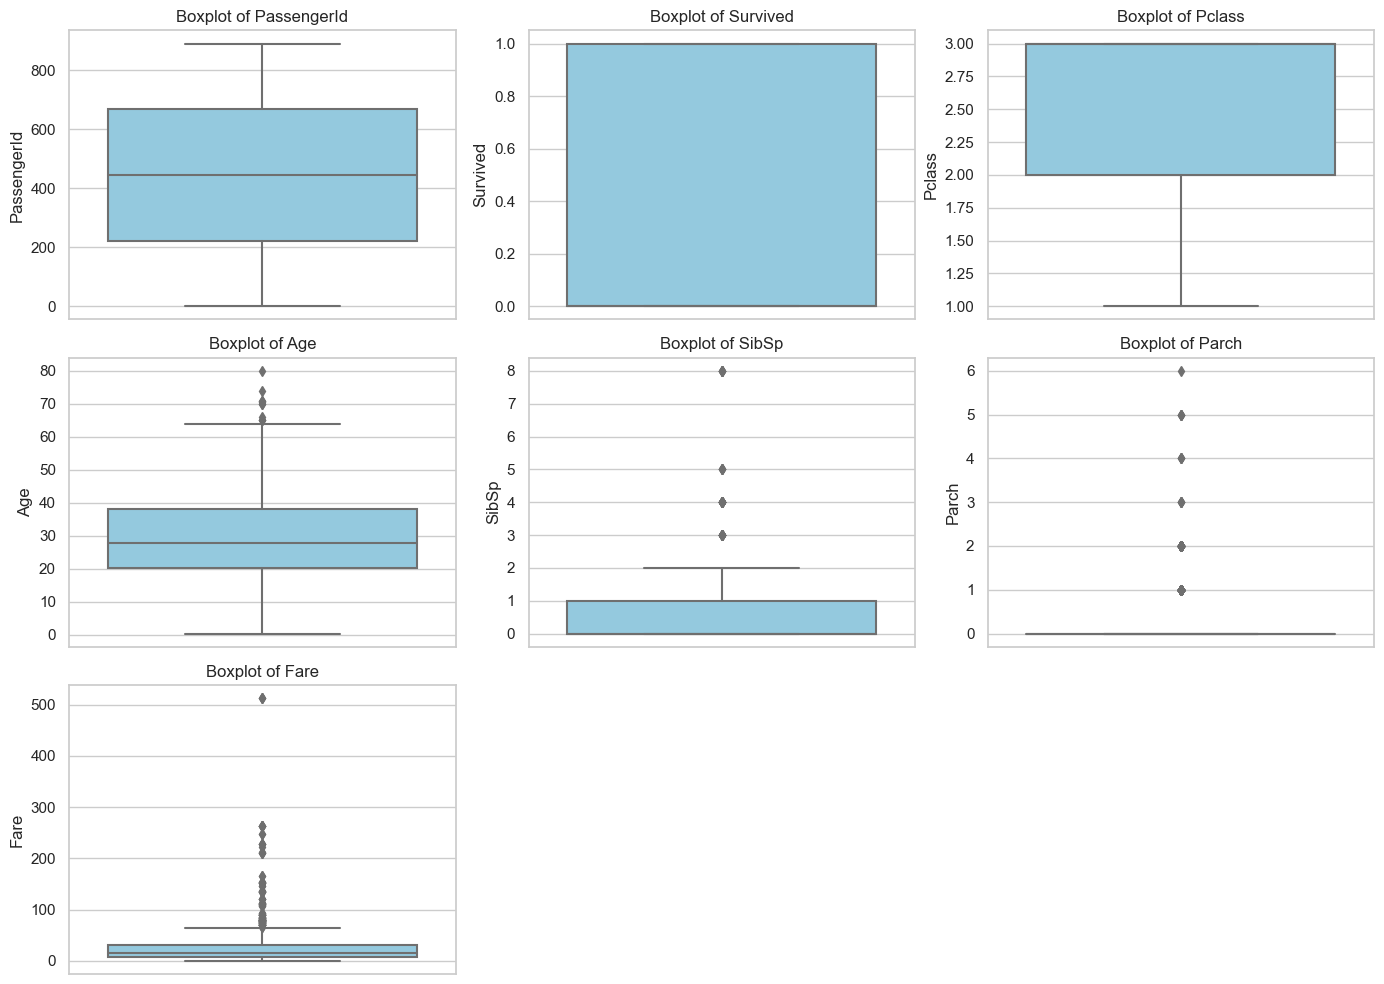

In [11]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix for numerical features
corr_matrix = df[numeric_features].corr()

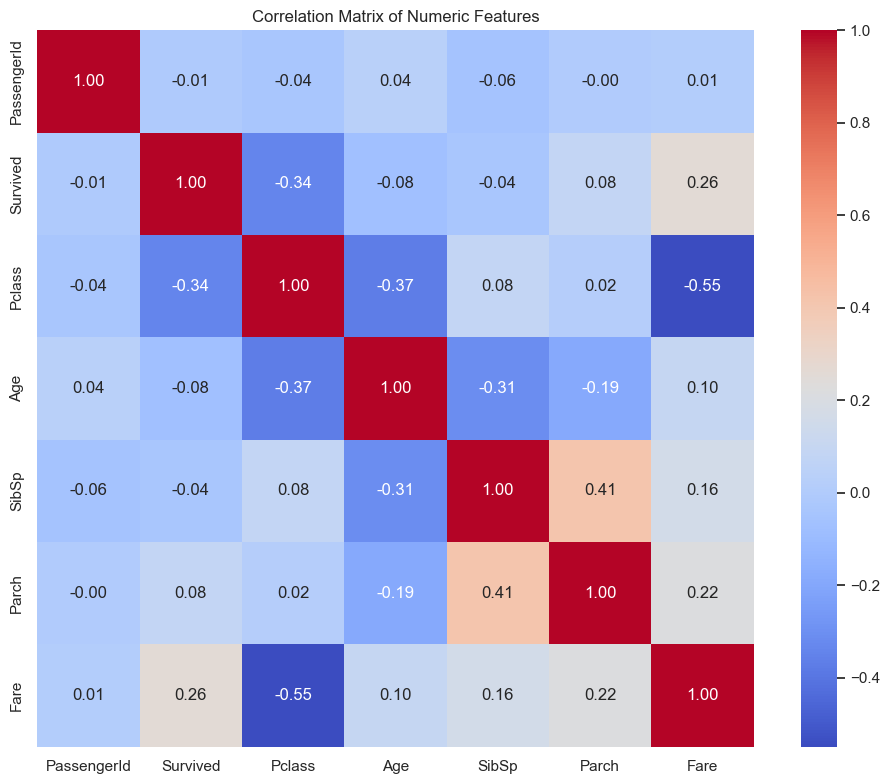

In [13]:
# Plot correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


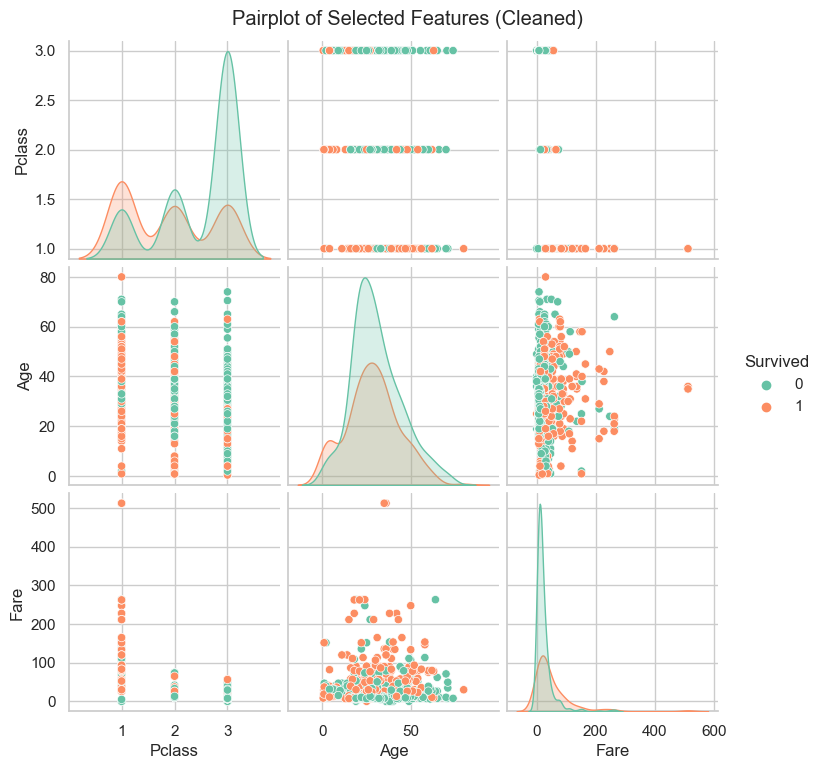

In [15]:
# Drop rows with missing values in selected features
clean_df = df[['Survived', 'Pclass', 'Age', 'Fare']].dropna()

# Generate pairplot again
sns.pairplot(clean_df, hue='Survived', palette='Set2')
plt.suptitle('Pairplot of Selected Features (Cleaned)', y=1.02)
plt.show()